In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## install xgboost with internet connection
# from xgboost import XGBRegressor

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data = pd.read_excel('3- Ordered Data for Hackaton.xlsx')
data

,Gender,State,Escalated Navigation,Intervention Required,Claim_Segment_Name,Date_of_Accident,Claim_How_Reported_Name,Claim_Finalised_Date,Days_Open,RTW_Plan_Status_Name,Policy_Issue_State_Name,Accident_type_code,Nature_of_loss_code,Bodily_location_code,Med_Cert_Capacity,Med_cert_unfit_restricted_weekdays,Wage_amount,Interstate_workers_flag,Payment_early_intervention_rehab,Payment_medicolegal,Payment_Rehab,Payment_travel_accomodation,Payment_weekly_compensation,Hours_worked_per_week,Fitness_week2,Fitness_week6,Fitness_week12,Fitness_wekk26,Fitness_week52,Work Status at Referral,Priority,Navigation Status,"All calls are recorded, can we continue?",Are You Getting Better?,How Do You Find Your Doctor?,How Do You Find Your Case Manager?,Spoken With Any of Your Co-Workers?,Are you seeing a Therapist?,Is therapy helpful for you?,How long have you had your pain problem?,Rate the pain that you have had?,I can do light work for an hour?,I can sleep at night?,How tense or anxious have you felt?,Have been bothered by feeling depressed?,Risk current pain may become persistent?,Chance you'll be working normal duties?,Increase in pain indicates I should stop,I should not do my normal work with pain,Unable to control the important things?,Your ability to handle personal problems,You felt that things were going your way,Felt difficulties were piling up high?,How are you going financially?,Perceived Stress Scale Short Form Total,Z-Score,Significant Stress,First Orebro Score,Significant Pain Complications,Orebro Musculoskeletal Pain Total,Claim_Risk_Assessment,Initial_estimate,Payment_legal_defendant,Payment_legal_plaintiff,Payment_Impairment,Payment_investigation_surveillance,Net_total_incurred,Total_Paid,Other_Paid,Payment_medical,Other_paid_risk
0,1.0,NaN,1,2.0,1,2022-03-08,1,2022-06-09,85,1,1,23,149,461,1.0,33.0,365.89,2,385.0,0.0,0.00,694.08,2122.06,15.0,2.0,2.0,1.0,1.0,1.0,2.0,1,2,1,1,1.0,2.0,1,NaN,NaN,3,3,5,7,3,4,5,5,10,10,3.0,5.0,2.0,2.0,5.0,6,0.04,1,51.0,2,51.0,1.0,36400.00,0.0,0.0,0.0,0.0,13315.74,13315.74,1079.08,10114.60,11193.68
1,2.0,1.0,0,2.0,2,2022-09-28,1,2023-05-05,211,1,2,41,190,680,1.0,32.0,0.00,2,0.0,111.1,4936.81,0.00,0.00,40.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,1,1,2.0,3.0,1,1.0,1.0,3,0,10,10,8,8,4,10,10,7,4.0,3.0,3.0,3.0,3.0,9,-0.92,1,40.0,1,40.0,NaN,8500.00,0.0,0.0,0.0,0.0,10591.49,10591.49,5047.91,5543.58,10591.49
2,1.0,2.0,0,NaN,1,2022-10-11,1,2023-03-20,158,1,3,44,533,310,2.0,9.0,1418.32,2,0.0,0.0,1155.00,0.00,1346.72,40.0,1.0,1.0,1.0,1.0,1.0,2.0,2,1,1,1,1.0,NaN,0,NaN,NaN,1,6,10,3,1,6,2,10,10,10,3.0,4.0,4.0,3.0,10.0,6,0.04,1,43.0,1,43.0,NaN,32000.00,0.0,0.0,0.0,0.0,3043.82,3043.82,1155.00,542.10,1697.10
3,1.0,1.0,0,NaN,1,2022-09-09,1,2022-12-19,91,1,2,11,80,461,3.0,30.0,20.00,2,0.0,0.0,385.00,0.00,0.00,38.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,1,1,1.0,1.0,1,0.0,NaN,3,0,7,7,4,2,0,8,0,10,1.0,5.0,5.0,1.0,7.0,0,1.95,1,27.0,1,27.0,1.0,14400.00,0.0,0.0,0.0,0.0,7939.00,7939.00,385.00,7554.00,7939.00
4,1.0,2.0,0,NaN,1,2022-09-21,1,2023-02-10,121,1,3,26,118,461,3.0,23.0,2872.00,2,0.0,0.0,770.00,0.00,14360.00,40.0,1.0,1.0,1.0,1.0,1.0,1.0,2,2,1,1,1.0,2.0,1,0.0,NaN,2,4,8,10,3,0,0,10,10,7,1.0,5.0,5.0,1.0,10.0,0,1.95,1,28.0,1,28.0,2.0,54500.00,0.0,0.0,0.0,0.0,23416.48,23416.48,770.00,8286.48,9056.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,1.0,2.0,0,2.0,1,2022-11-01,2,2023-06-16,211,1,3,42,541,530,1.0,64.0,2278.90,2,0.0,0.0,7036.06,0.00,16900.06,40.0,2.0,1.0,1.0,1.0,1.0,2.0,2,1,1,1,1.0,2.0,0,NaN,NaN,3,5,4,8,0,0,5,10,10,10,2.0,5.0,4.0,2.0,6.0,3,0.99,1,41.0,1,41.0,1.0,37000.00,0.0,0.0,0.0,0.0,26866.38,26866.38,7036.06,2930.26,9966.32
548,1.0,NaN,0,NaN,2,2022-04-08,1,2022-08-30,123,1,1,42,533,311,1.0,11.0,2157.30,2,0.0,0.0,770.00,22.19,3024.08,36.0,3.0,1.0,1.0,1.0,1.0,1.0,2,1,1,0,1.0,1.0,1,0.0,NaN,2,3,7,

In [5]:
def data_explorer(data_frame):
    
    print("Shape of data is {}".format(data_frame.shape))
    print("+"*70)
    
    
    print("Total number of null values in data is -")
    null_values = data_frame.isnull().sum().sum()
    print(null_values)
    if null_values > 0:
        
        print("Null values in the columns -")
        print(data_frame.isnull().sum())
        
        #Getting null values as percentage
        print(np.round(data_frame.isnull().sum()/len(data_frame),2))
        
    print("="*70)
        
        
    print("Statistical analysis of the data is -")
    
    print(data_frame.describe())
    
    print("="*70)
    
    print("Getting statistical analysis of object values - ")
    print(data_frame.describe(exclude=['float','int64']))
    
    
data_explorer(data)

Shape of data is (552, 71)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total number of null values in data is -
1612
Null values in the columns -
Gender                     5
State                    239
Escalated Navigation       0
Intervention Required    362
Claim_Segment_Name         0
                        ... 
Net_total_incurred         0
Total_Paid                 2
Other_Paid                 5
Payment_medical            1
Other_paid_risk            0
Length: 71, dtype: int64
Gender                   0.01
State                    0.43
Escalated Navigation     0.00
Intervention Required    0.66
Claim_Segment_Name       0.00
                         ... 
Net_total_incurred       0.00
Total_Paid               0.00
Other_Paid               0.01
Payment_medical          0.00
Other_paid_risk          0.00
Length: 71, dtype: float64
Statistical analysis of the data is -
           Gender       State  Escalated Navigation  Intervention Required  \
count  547

/var/folders/x7/g3fsqfgn69d61zjb3lbhkww80000gn/T/ipykernel_81344/1656865519.py:28: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data_frame.describe(exclude=['float','int64']))
/var/folders/x7/g3fsqfgn69d61zjb3lbhkww80000gn/T/ipykernel_81344/1656865519.py:28: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data_frame.describe(exclude=['float','int64']))


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 71 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Gender                                    547 non-null    float64       
 1   State                                     313 non-null    float64       
 2   Escalated Navigation                      552 non-null    int64         
 3   Intervention Required                     190 non-null    float64       
 4   Claim_Segment_Name                        552 non-null    int64         
 5   Date_of_Accident                          552 non-null    datetime64[ns]
 6   Claim_How_Reported_Name                   552 non-null    int64         
 7   Claim_Finalised_Date                      552 non-null    datetime64[ns]
 8   Days_Open                                 552 non-null    int64         
 9   RTW_Plan_Status_Name            

In [22]:
nulll_values = data.isnull().sum().reset_index().rename(columns={'index':'columns',0:'null_values'})
nulll_values['percentage'] = np.round(nulll_values['null_values']/len(data)*100,2)
col_with_null_val = list(nulll_values[nulll_values['null_values']>0]['columns'])
col_with_null_val

['Gender',
 'State',
 'Intervention Required',
 'Med_Cert_Capacity',
 'Med_cert_unfit_restricted_weekdays',
 'Payment_early_intervention_rehab',
 'Payment_medicolegal',
 'Payment_Rehab',
 'Payment_travel_accomodation',
 'Payment_weekly_compensation',
 'Fitness_week2',
 'Fitness_week6',
 'Fitness_week12',
 'Fitness_wekk26',
 'Fitness_week52',
 'Work Status at Referral',
 'How Do You Find Your Doctor?',
 'How Do You Find Your Case Manager?',
 'Are you seeing a Therapist?',
 'Is therapy helpful for you?',
 'Unable to control the important things?',
 'Your ability to handle personal problems',
 'You felt that things were going your way',
 'Felt difficulties were piling up high?',
 'How are you going financially?',
 'First Orebro Score',
 'Orebro Musculoskeletal Pain Total',
 'Claim_Risk_Assessment',
 'Initial_estimate',
 'Payment_legal_defendant',
 'Payment_legal_plaintiff',
 'Payment_Impairment',
 'Payment_investigation_surveillance',
 'Total_Paid',
 'Other_Paid',
 'Payment_medical']

In [19]:
## Let us check the variable where columns have more than 50% null values 

more_null_values = list(nulll_values[nulll_values['percentage']>50]['columns'].unique())
## We can remove these variables as there are lot of null values

data_2 = data.drop(more_null_values,axis=1)

In [23]:
for col in  col_with_null_val:
    if col in data_2.columns:
        
        data_2[col].fillna(data_2[col].mean())
        

In [24]:
data_2.isnull().sum().sum()

745

In [7]:
data[data['Gender'].isnull()]

,Gender,State,Escalated Navigation,Intervention Required,Claim_Segment_Name,Date_of_Accident,Claim_How_Reported_Name,Claim_Finalised_Date,Days_Open,RTW_Plan_Status_Name,Policy_Issue_State_Name,Accident_type_code,Nature_of_loss_code,Bodily_location_code,Med_Cert_Capacity,Med_cert_unfit_restricted_weekdays,Wage_amount,Interstate_workers_flag,Payment_early_intervention_rehab,Payment_medicolegal,Payment_Rehab,Payment_travel_accomodation,Payment_weekly_compensation,Hours_worked_per_week,Fitness_week2,Fitness_week6,Fitness_week12,Fitness_wekk26,Fitness_week52,Work Status at Referral,Priority,Navigation Status,"All calls are recorded, can we continue?",Are You Getting Better?,How Do You Find Your Doctor?,How Do You Find Your Case Manager?,Spoken With Any of Your Co-Workers?,Are you seeing a Therapist?,Is therapy helpful for you?,How long have you had your pain problem?,Rate the pain that you have had?,I can do light work for an hour?,I can sleep at night?,How tense or anxious have you felt?,Have been bothered by feeling depressed?,Risk current pain may become persistent?,Chance you'll be working normal duties?,Increase in pain indicates I should stop,I should not do my normal work with pain,Unable to control the important things?,Your ability to handle personal problems,You felt that things were going your way,Felt difficulties were piling up high?,How are you going financially?,Perceived Stress Scale Short Form Total,Z-Score,Significant Stress,First Orebro Score,Significant Pain Complications,Orebro Musculoskeletal Pain Total,Claim_Risk_Assessment,Initial_estimate,Payment_legal_defendant,Payment_legal_plaintiff,Payment_Impairment,Payment_investigation_surveillance,Net_total_incurred,Total_Paid,Other_Paid,Payment_medical,Other_paid_risk
72,NaN,NaN,0,NaN,1,2022-07-15,1,2022-11-18,122,1,1,21,239,461,4.0,22.0,945.57,2,0.0,0.0,1540.00,0.00,3402.00,38.0,1.0,1.0,1.0,1.0,1.0,2.0,2,1,1,1,1.0,1.0,1,NaN,NaN,2,0,10,10,0,0,2,10,10,10,2.0,4.0,4.0,1.0,10.0,3,0.99,1,24.0,1,24.0,1.0,10000.00,0.0,0.0,0.0,0.00,6381.45,6381.45,1540.00,1439.45,2979.45
266,NaN,NaN,0,NaN,1,2022-06-17,1,2022-11-15,146,7,4,41,459,540,4.0,36.0,0.00,2,0.0,0.0,2814.27,0.00,0.00,37.5,2.0,1.0,1.0,1.0,1.0,2.0,2,1,1,1,1.0,NaN,1,0.0,NaN,3,2,9,10,1,0,0,10,10,10,3.0,5.0,4.0,1.0,10.0,3,0.99,1,27.0,1,27.0,NaN,12310.00,0.0,0.0,0.0,4657.49,8334.44,8334.44,7471.76,862.68,8334.44
295,NaN,NaN,1,NaN,1,2022-07-13,1,2023-05-24,309,1,2,41,10,450,1.0,55.0,978.42,2,0.0,0.0,1155.00,2503.65,12719.46,38.0,1.0,1.0,1.0,1.0,1.0,1.0,3,3,1,1,1.0,NaN,1,0.0,NaN,3,3,5,3,6,5,4,10,10,10,5.0,3.0,4.0,3.0,6.0,9,-0.92,1,53.0,2,53.0,1.0,67000.00,0.0,0.0,0.0,0.00,36038.51,36038.51,3658.65,19660.40,23319.05
380,NaN,NaN,1,NaN,2,2022-06-30,1,2023-01-25,190,1,1,41,533,520,1.0,98.0,1051.02,2,0.0,3520.0,9511.10,0.00,12511.45,40.0,2.0,1.0,1.0,1.0,1.0,2.0,1,2,1,1,1.0,1.0,1,0.0,NaN,3,5,2,2,5,5,1,10,10,10,2.0,5.0,3.0,3.0,10.0,5,0.35,1,55.0,2,55.0,3.0,51853.88,0.0,0.0,0.0,0.00,29768.18,29768.18,13031.10,4225.63,17256.73
497,NaN,NaN,0,2.0,2,2022-07-13,1,2022-11-16,120,3,4,41,479,219,1.0,36.0,1007.88,2,0.0,0.0,3395.15,0.00,0.00,38.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,1,1,1.0,1.0,1,NaN,NaN,4,2,10,10,0,0,0,10,10,10,1.0,5.0,5.0,1.0,10.0,0,1.95,1,26.0,1,26.0,1.0,10000.00,0.0,0.0,0.0,0.00,4819.86,4819.86,3395.15,1424.71,4819.86


In [8]:
data.Gender.describe()

count    547.000000
mean       1.285192
std        0.451919
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Gender, dtype: float64

## First model

In [6]:
##
data.corr()

/var/folders/x7/g3fsqfgn69d61zjb3lbhkww80000gn/T/ipykernel_81344/3897136786.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Gender,State,Escalated Navigation,Intervention Required,Claim_Segment_Name,Claim_How_Reported_Name,Days_Open,RTW_Plan_Status_Name,Policy_Issue_State_Name,Accident_type_code,Nature_of_loss_code,Bodily_location_code,Med_Cert_Capacity,Med_cert_unfit_restricted_weekdays,Wage_amount,Interstate_workers_flag,Payment_early_intervention_rehab,Payment_medicolegal,Payment_Rehab,Payment_travel_accomodation,Payment_weekly_compensation,Hours_worked_per_week,Fitness_week2,Fitness_week6,Fitness_week12,Fitness_wekk26,Fitness_week52,Work Status at Referral,Priority,Navigation Status,"All calls are recorded, can we continue?",Are You Getting Better?,How Do You Find Your Doctor?,How Do You Find Your Case Manager?,Spoken With Any of Your Co-Workers?,Are you seeing a Therapist?,Is therapy helpful for you?,How long have you had your pain problem?,Rate the pain that you have had?,I can do light work for an hour?,I can sleep at night?,How tense or anxious have you felt?,Have been bothered by feeling depressed?,Risk current pain may become persistent?,Chance you'll be working normal duties?,Increase in pain indicates I should stop,I should not do my normal work with pain,Unable to control the important things?,Your ability to handle personal problems,You felt that things were going your way,Felt difficulties were piling up high?,How are you going financially?,Perceived Stress Scale Short Form Total,Z-Score,Significant Stress,First Orebro Score,Significant Pain Complications,Orebro Musculoskeletal Pain Total,Claim_Risk_Assessment,Initial_estimate,Payment_legal_defendant,Payment_legal_plaintiff,Payment_Impairment,Payment_investigation_surveillance,Net_total_incurred,Total_Paid,Other_Paid,Payment_medical,Other_paid_risk
Gender,1.000000,-0.016620,0.070826,-0.083907,0.009099,-0.059949,0.094358,-0.005975,-0.009054,-0.038738,-0.005420,0.009097,-0.069918,0.117913,-0.179744,0.041292,0.129274,0.010720,0.050314,-0.033225,-0.033694,-0.280732,0.012085,0.033839,-0.008636,-0.012605,-0.043700,0.067961,0.084172,0.125831,-0.056174,-0.006152,-0.032218,-0.046879,0.023953,0.207720,0.060311,0.055993,0.102340,-0.041606,-0.018702,0.161470,0.092927,0.093849,-0.021047,0.008204,0.009099,0.117618,-0.122412,-0.146310,0.169706,-0.010860,0.190138,-0.190179,0.092284,0.115333,0.070826,0.116240,0.005743,-0.044289,-0.024667,-0.034678,-0.043906,0.025044,-0.032391,-0.033051,-0.014414,0.021758,-0.018695
State,-0.016620,1.000000,0.071139,-0.008105,0.006033,0.138391,0.084392,0.146634,-0.114733,-0.041645,0.026133,0.109580,0.058602,0.147050,-0.000397,-0.676041,-0.081345,0.011198,0.152623,0.136776,-0.022956,0.071129,0.132437,0.107327,0.093651,0.045074,0.059107,0.069017,0.012438,-0.034869,-0.076377,-0.022973,0.003479,-0.109524,-0.011402,0.006614,-0.003880,0.031098,0.051915,-0.093064,-0.045278,-0.102504,-0.084237,0.017235,-0.053251,0.100707,0.099183,0.066222,-0.029068,-0.078097,-0.022698,0.032885,0.057871,-0.057713,0.065581,0.052121,0.071139,0.052982,0.010178,-0.024205,0.045213,0.081488,0.102165,-0.018393,0.049939,0.049445,0.126301,-0.004560,0.094313
Escalated Navigation,0.070826,0.071139,1.000000,-0.473767,-0.115854,-0.077661,0.150349,0.047144,0.068776,-0.014467,0.058282,0.007707,0.135085,0.245923,-0.029641,-0.147142,0.044108,0.179084,0.209470,0.095213,0.179055,0.004958,0.170409,0.175797,0.148989,0.049318,0.098044,0.042321,-0.269608,0.682439,-0.010444,-0.261548,0.093336,0.097163,-0.048409,0.079194,-0.300228,0.242129,0.368773,-0.340962,-0.373602,0.574978,0.595081,0.440943,-0.384816,0.095208,0.270970,0.321083,-0.314037,-0.357296,0.345773,-0.294219,0.458964,-0.458981,0.245026,0.717304,1.000000,0.715094,0.131182,0.168371,0.205228,0.150623,-0.024333,0.168180,0.221770,0.224144,0.195082,0.135721,0.179494
Intervention Required,-0.083907,-0.008105,-0.473767,1.000000,0.143644,0.165644,0.002935,-0.043116,-0.128066,0.046949,-0.162121,0.044555,-0.059349,-0.085570,0.067388,-0.010271,0.049380,-0.103469,-0.201472,0.023795,-0.248046,0.085621,-0.057077,-0.063901,-0.155234,-0.239599,-0.213894,-0.109376,-0.580242,

/var/folders/x7/g3fsqfgn69d61zjb3lbhkww80000gn/T/ipykernel_81344/4130684694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

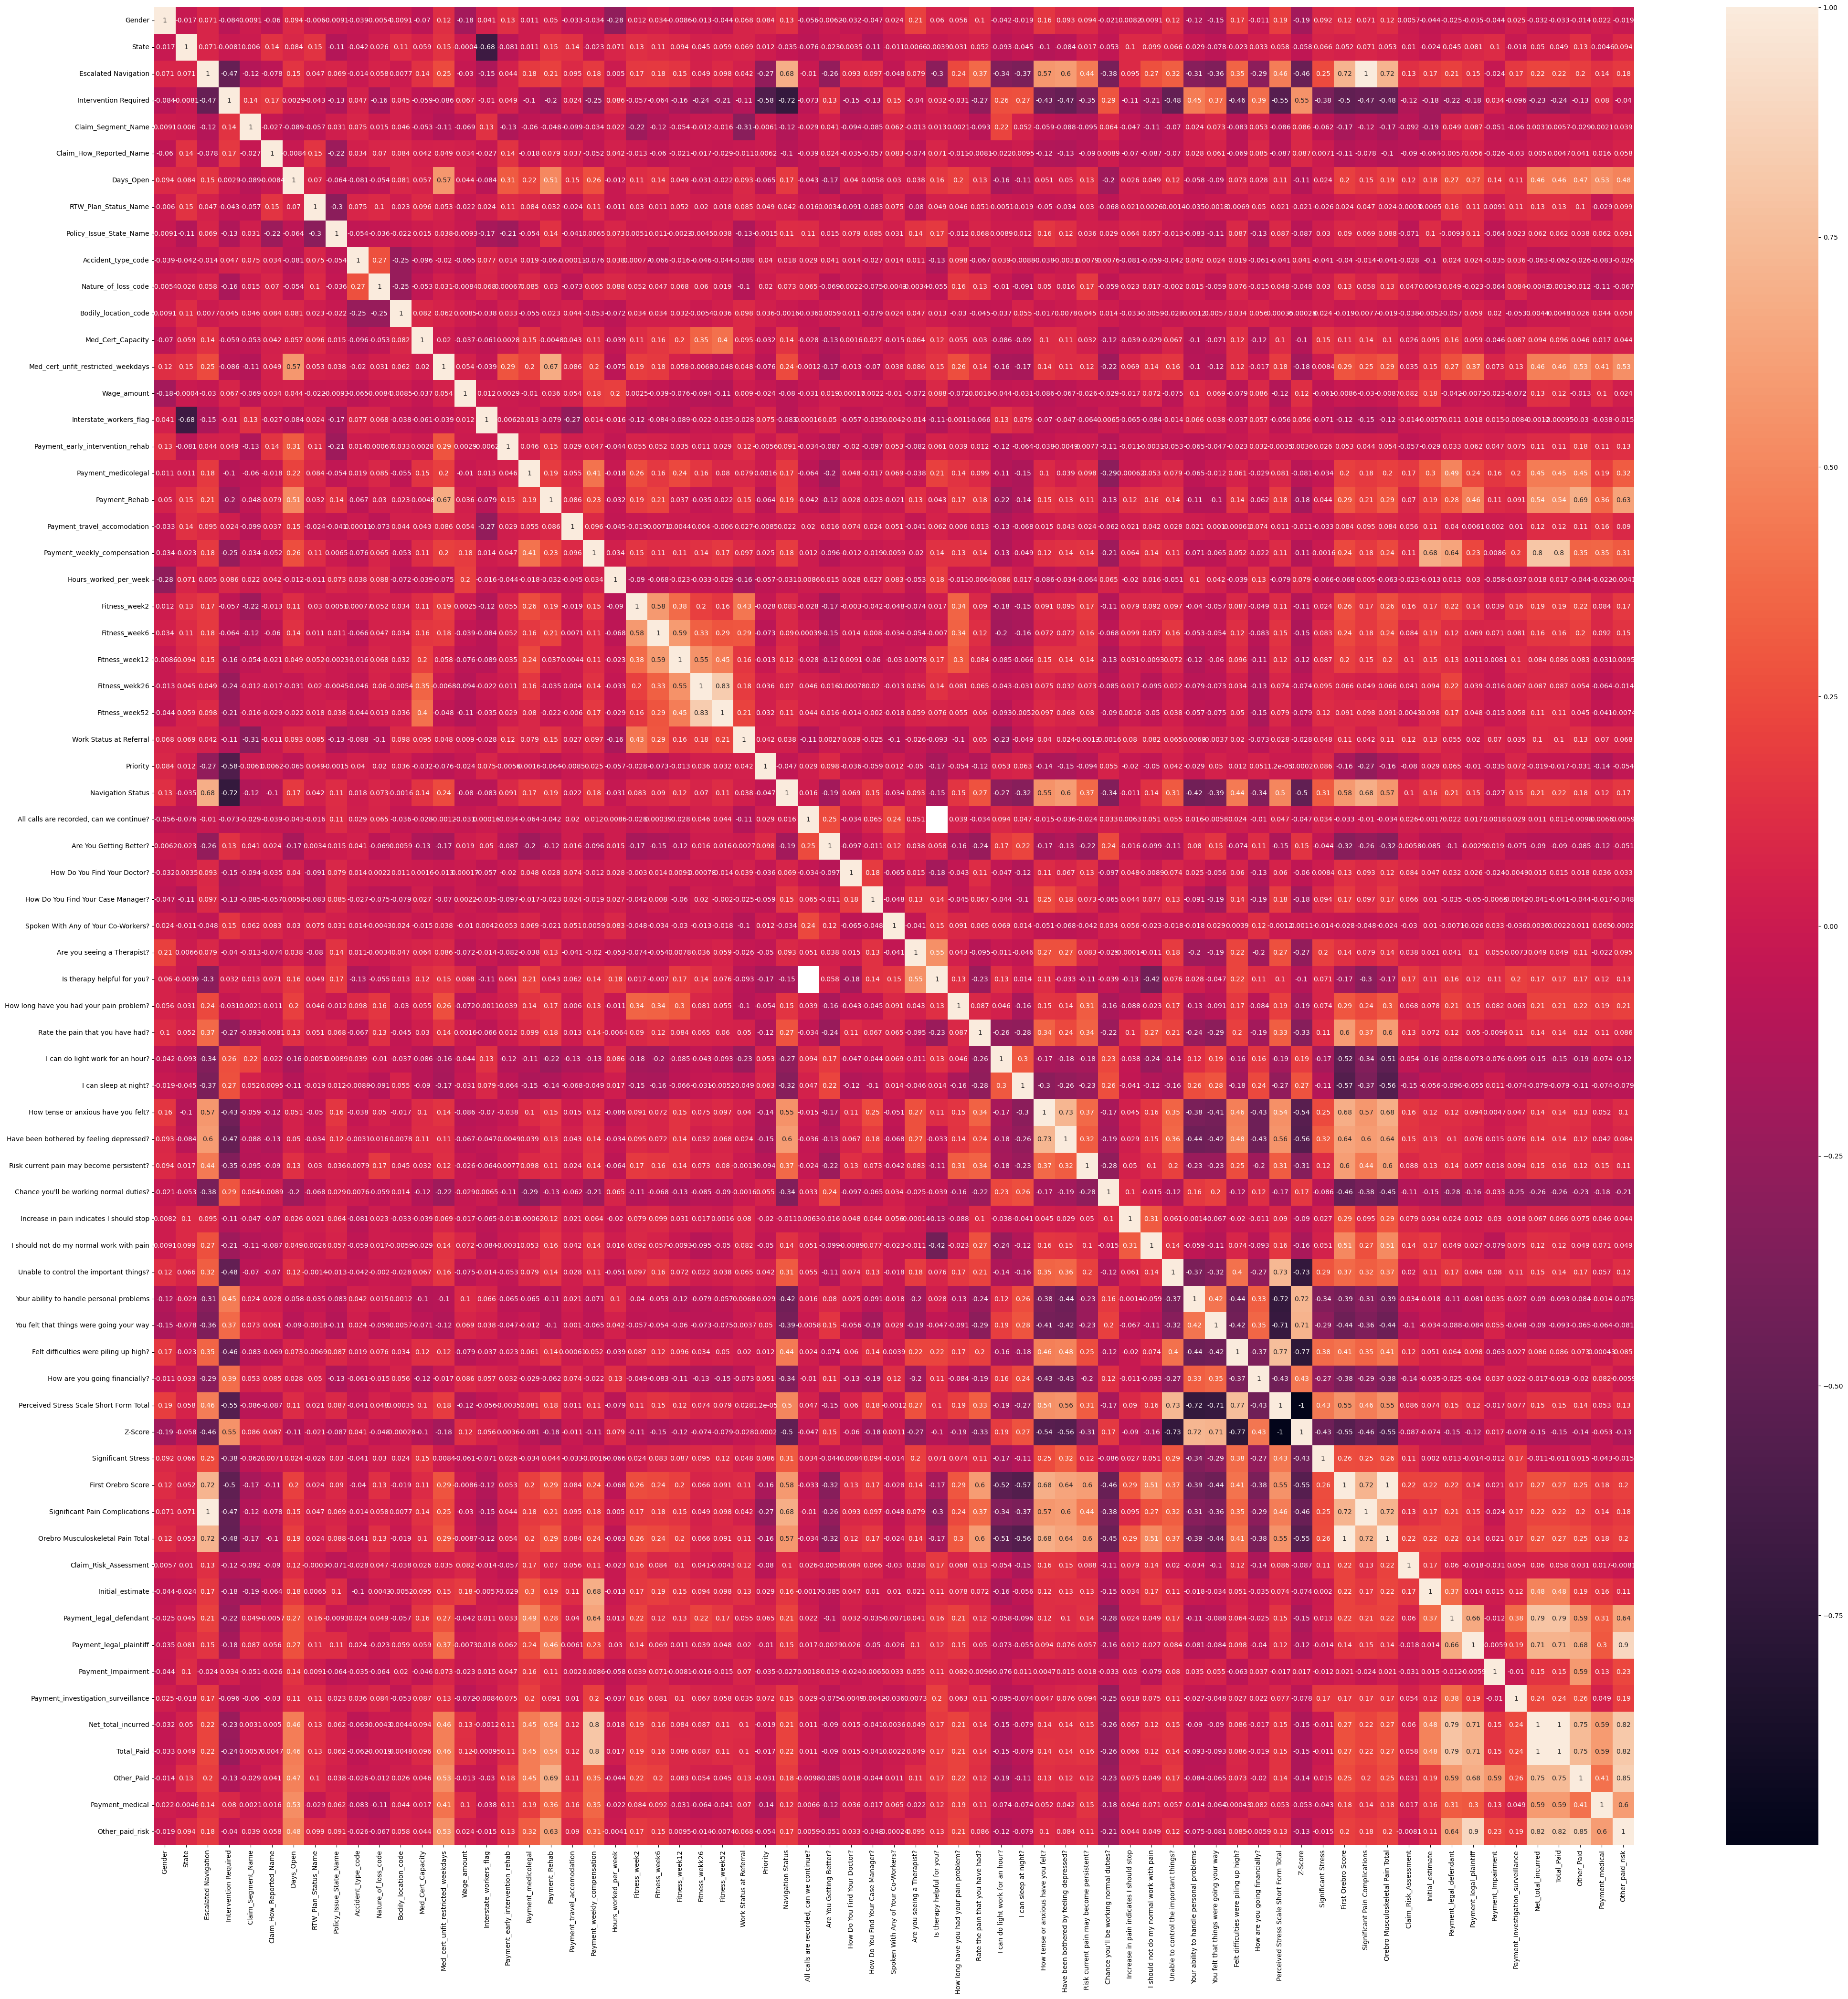

In [15]:
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(),annot=True)

In [22]:
correlation_values = data.corr().reset_index()
correlation_values[(correlation_values['Fitness_week2']>0.3)|(correlation_values['Fitness_week6']>0.3)|\
                  (correlation_values['Fitness_week12']>0.3)|(correlation_values['Fitness_wekk26']>0.3)|\
                  (correlation_values['Fitness_week52']>0.3)]

/var/folders/x7/g3fsqfgn69d61zjb3lbhkww80000gn/T/ipykernel_81344/3683630005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_values = data.corr().reset_index()


,index,Gender,State,Escalated Navigation,Intervention Required,Claim_Segment_Name,Claim_How_Reported_Name,Days_Open,RTW_Plan_Status_Name,Policy_Issue_State_Name,Accident_type_code,Nature_of_loss_code,Bodily_location_code,Med_Cert_Capacity,Med_cert_unfit_restricted_weekdays,Wage_amount,Interstate_workers_flag,Payment_early_intervention_rehab,Payment_medicolegal,Payment_Rehab,Payment_travel_accomodation,Payment_weekly_compensation,Hours_worked_per_week,Fitness_week2,Fitness_week6,Fitness_week12,Fitness_wekk26,Fitness_week52,Work Status at Referral,Priority,Navigation Status,"All calls are recorded, can we continue?",Are You Getting Better?,How Do You Find Your Doctor?,How Do You Find Your Case Manager?,Spoken With Any of Your Co-Workers?,Are you seeing a Therapist?,Is therapy helpful for you?,How long have you had your pain problem?,Rate the pain that you have had?,I can do light work for an hour?,I can sleep at night?,How tense or anxious have you felt?,Have been bothered by feeling depressed?,Risk current pain may become persistent?,Chance you'll be working normal duties?,Increase in pain indicates I should stop,I should not do my normal work with pain,Unable to control the important things?,Your ability to handle personal problems,You felt that things were going your way,Felt difficulties were piling up high?,How are you going financially?,Perceived Stress Scale Short Form Total,Z-Score,Significant Stress,First Orebro Score,Significant Pain Complications,Orebro Musculoskeletal Pain Total,Claim_Risk_Assessment,Initial_estimate,Payment_legal_defendant,Payment_legal_plaintiff,Payment_Impairment,Payment_investigation_surveillance,Net_total_incurred,Total_Paid,Other_Paid,Payment_medical,Other_paid_risk
12,Med_Cert_Capacity,-0.069918,0.058602,0.135085,-0.059349,-0.053281,0.042344,0.056510,0.096289,0.014564,-0.096443,-0.052950,0.082254,1.000000,0.019926,-0.036677,-0.060737,0.002758,0.146888,-0.004793,0.042936,0.111427,-0.039448,0.114123,0.163987,0.201907,0.347187,0.403505,0.094842,-0.032208,0.142809,-0.027769,-0.133325,0.001646,0.026628,-0.015076,0.063957,0.121502,0.055476,0.030433,-0.086369,-0.090164,0.102522,0.113915,0.032347,-0.116213,-0.039133,-0.028780,0.067290,-0.102678,-0.071231,0.119724,-0.118753,0.103926,-0.103938,0.150496,0.106214,0.135085,0.102708,0.026082,0.094741,0.159155,0.059077,-0.046279,0.086946,0.093853,0.095568,0.046033,0.017406,0.043556
22,Fitness_week2,0.012085,0.132437,0.170409,-0.057077,-0.217114,-0.013089,0.109576,0.030416,0.005061,0.000765,0.052101,0.033932,0.114123,0.191783,0.002521,-0.123604,0.054845,0.256917,0.186088,-0.018896,0.149327,-0.089630,1.000000,0.579895,0.376861,0.196746,0.157874,0.427828,-0.027524,0.082787,-0.027647,-0.166719,-0.002954,-0.042252,-0.047732,-0.073807,0.016578,0.344716,0.089844,-0.175854,-0.152993,0.091140,0.094826,0.174032,-0.113523,0.079340,0.092214,0.097135,-0.040140,-0.057033,0.086805,-0.049242,0.106564,-0.106409,0.024108,0.256106,0.170409,0.256932,0.163365,0.168793,0.217782,0.137479,0.038755,0.155927,0.193698,0.192039,0.219793,0.083535,0.166540
23,Fitness_week6,0.033839,0.107327,0.175797,-0.063901,-0.121251,-0.060014,0.137386,0.011134,0.010691,-0.066331,0.046995,0.034176,0.163987,0.175358,-0.038968,-0.083891,0.052274,0.164868,0.211107,0.007077,0.114659,-0.067879,0.579895,1.000000,0.593202,0.331040,0.286680,0.294375,-0.072903,0.089695,0.000391,-0.147375,0.014090,0.008049,-0.033968,-0.053697,-0.006991,0.343293,0.121290,-0.195118,-0.160001,0.071565,0.071923,0.157589,-0.067659,0.099419,0.056656,0.163480,-0.052656,-0.054150,0.118282,-0.082846,0.147359,-0.147286,0.083003,0.238202,0.175797,0.238367,0.084445,0.190854,0.117854,0.068832,0.070779,0.080616,0.157394,0.156907,0.200512,0.092470,0.145238
24,Fitness_week12,-0.008636,0.093651,0.148989,-0.155234,-0.054241,-0.021034,0.049231,0.051583,-0.002320,-0.015833,0.067850,0.032018,0.201907,0.058086,-0.076169,-0.088704,0.034550,0.238155,0.037182,0.004357,0.114164,-0.023168,0.376861,0.593202,1.000000,0.548474,0.454147,0.163266,-0.012529,0.1

In [33]:
data['Z-Score'] = abs(data['Z-Score'])
data['Net_total_incurred'] = abs(data['Net_total_incurred'])

In [34]:
import numpy as np
from scipy.stats import chi2_contingency

# # Example contingency table
# observed_data = np.array([[70, 30], [20, 80]])

significant_variables = []
for col in data.columns:
    
    
    print(col)
    print("="*70)
    
    if col == 'Fitness_week2' or col == 'Date_of_Accident' or col == 'Claim_Finalised_Date':
        pass
    else:
        
        a_data = data[[col,'Fitness_week2']]
        chi2_stat, p_val, dof, expected = chi2_contingency(a_data)

        print(f"Chi-square statistic: {chi2_stat}")
        print(f"P-value: {p_val}")
        print(f"Degrees of freedom: {dof}")
        print("Expected frequencies:")
#         print(expected)

        if p_val < 0.05:
#             print("There is a significant association between the variables.")
            significant_variables.append(col)
        else:
#             print("There is no significant association between the variables.")
            pass
            
            


Gender
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
State
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Escalated Navigation
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Intervention Required
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Claim_Segment_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Date_of_Accident
Claim_How_Reported_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Claim_Finalised_Date
Days_Open
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
RTW_Plan_Status_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Policy_Issue_State_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Accident_type_code
Chi-square statistic: na

In [35]:
significant_variables

[]

In [36]:
import numpy as np
from scipy.stats import chi2_contingency

# # Example contingency table
# observed_data = np.array([[70, 30], [20, 80]])

significant_variables = []
for col in data.columns:
    
    
    print(col)
    print("="*70)
    
    if col == 'Fitness_week2' or col == 'Date_of_Accident' or col == 'Claim_Finalised_Date':
        pass
    else:
        
        a_data = data[[col,'Fitness_week6']]
        chi2_stat, p_val, dof, expected = chi2_contingency(a_data)

        print(f"Chi-square statistic: {chi2_stat}")
        print(f"P-value: {p_val}")
        print(f"Degrees of freedom: {dof}")
        print("Expected frequencies:")
#         print(expected)

        if p_val < 0.05:
#             print("There is a significant association between the variables.")
            significant_variables.append(col)
        else:
#             print("There is no significant association between the variables.")
            pass
            
            


Gender
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
State
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Escalated Navigation
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Intervention Required
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Claim_Segment_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Date_of_Accident
Claim_How_Reported_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Claim_Finalised_Date
Days_Open
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
RTW_Plan_Status_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Policy_Issue_State_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Accident_type_code
Chi-square statistic: na

In [37]:
significant_variables

[]

In [38]:
import numpy as np
from scipy.stats import chi2_contingency

# # Example contingency table
# observed_data = np.array([[70, 30], [20, 80]])

significant_variables = []
for col in data.columns:
    
    
    print(col)
    print("="*70)
    
    if col == 'Fitness_week12' or col == 'Date_of_Accident' or col == 'Claim_Finalised_Date':
        pass
    else:
        
        a_data = data[[col,'Fitness_week12']]
        chi2_stat, p_val, dof, expected = chi2_contingency(a_data)

        print(f"Chi-square statistic: {chi2_stat}")
        print(f"P-value: {p_val}")
        print(f"Degrees of freedom: {dof}")
        print("Expected frequencies:")
#         print(expected)

        if p_val < 0.05:
#             print("There is a significant association between the variables.")
            significant_variables.append(col)
        else:
#             print("There is no significant association between the variables.")
            pass
            
            


Gender
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
State
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Escalated Navigation
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Intervention Required
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Claim_Segment_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Date_of_Accident
Claim_How_Reported_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Claim_Finalised_Date
Days_Open
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
RTW_Plan_Status_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Policy_Issue_State_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Accident_type_code
Chi-square statistic: na

In [39]:
significant_variables

[]

In [41]:
import numpy as np
from scipy.stats import chi2_contingency

# # Example contingency table
# observed_data = np.array([[70, 30], [20, 80]])

significant_variables = []
for col in data.columns:
    
    
    print(col)
    print("="*70)
    
    if col == 'Fitness_wekk26' or col == 'Date_of_Accident' or col == 'Claim_Finalised_Date':
        pass
    else:
        
        a_data = data[[col,'Fitness_wekk26']]
        chi2_stat, p_val, dof, expected = chi2_contingency(a_data)

        print(f"Chi-square statistic: {chi2_stat}")
        print(f"P-value: {p_val}")
        print(f"Degrees of freedom: {dof}")
        print("Expected frequencies:")
#         print(expected)

        if p_val < 0.05:
#             print("There is a significant association between the variables.")
            significant_variables.append(col)
        else:
#             print("There is no significant association between the variables.")
            pass
            
            


Gender
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
State
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Escalated Navigation
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Intervention Required
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Claim_Segment_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Date_of_Accident
Claim_How_Reported_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Claim_Finalised_Date
Days_Open
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
RTW_Plan_Status_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Policy_Issue_State_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Accident_type_code
Chi-square statistic: na

In [42]:
significant_variables

[]

In [44]:
import numpy as np
from scipy.stats import chi2_contingency

# # Example contingency table
# observed_data = np.array([[70, 30], [20, 80]])

significant_variables = []
for col in data.columns:
    
    
    print(col)
    print("="*70)
    
    if col == 'Fitness_week52' or col == 'Date_of_Accident' or col == 'Claim_Finalised_Date':
        pass
    else:
        
        a_data = data[[col,'Fitness_week52']]
        chi2_stat, p_val, dof, expected = chi2_contingency(a_data)

        print(f"Chi-square statistic: {chi2_stat}")
        print(f"P-value: {p_val}")
        print(f"Degrees of freedom: {dof}")
        print("Expected frequencies:")
#         print(expected)

        if p_val < 0.05:
#             print("There is a significant association between the variables.")
            significant_variables.append(col)
        else:
#             print("There is no significant association between the variables.")
            pass
            
            


Gender
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
State
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Escalated Navigation
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Intervention Required
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Claim_Segment_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Date_of_Accident
Claim_How_Reported_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Claim_Finalised_Date
Days_Open
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
RTW_Plan_Status_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Policy_Issue_State_Name
Chi-square statistic: nan
P-value: nan
Degrees of freedom: 551
Expected frequencies:
Accident_type_code
Chi-square statistic: na

In [45]:
significant_variables

[]

In [48]:
data[['Fitness_week2','Fitness_week6','Fitness_week12','Fitness_wekk26','Fitness_week52']].isnull().sum()

Fitness_week2     7
Fitness_week6     7
Fitness_week12    7
Fitness_wekk26    7
Fitness_week52    7
dtype: int64

In [50]:
first_data =data.copy()
first_data = first_data[first_data['Fitness_week2'].notnull()].reset_index(drop=True)
first_data

,Gender,State,Escalated Navigation,Intervention Required,Claim_Segment_Name,Date_of_Accident,Claim_How_Reported_Name,Claim_Finalised_Date,Days_Open,RTW_Plan_Status_Name,Policy_Issue_State_Name,Accident_type_code,Nature_of_loss_code,Bodily_location_code,Med_Cert_Capacity,Med_cert_unfit_restricted_weekdays,Wage_amount,Interstate_workers_flag,Payment_early_intervention_rehab,Payment_medicolegal,Payment_Rehab,Payment_travel_accomodation,Payment_weekly_compensation,Hours_worked_per_week,Fitness_week2,Fitness_week6,Fitness_week12,Fitness_wekk26,Fitness_week52,Work Status at Referral,Priority,Navigation Status,"All calls are recorded, can we continue?",Are You Getting Better?,How Do You Find Your Doctor?,How Do You Find Your Case Manager?,Spoken With Any of Your Co-Workers?,Are you seeing a Therapist?,Is therapy helpful for you?,How long have you had your pain problem?,Rate the pain that you have had?,I can do light work for an hour?,I can sleep at night?,How tense or anxious have you felt?,Have been bothered by feeling depressed?,Risk current pain may become persistent?,Chance you'll be working normal duties?,Increase in pain indicates I should stop,I should not do my normal work with pain,Unable to control the important things?,Your ability to handle personal problems,You felt that things were going your way,Felt difficulties were piling up high?,How are you going financially?,Perceived Stress Scale Short Form Total,Z-Score,Significant Stress,First Orebro Score,Significant Pain Complications,Orebro Musculoskeletal Pain Total,Claim_Risk_Assessment,Initial_estimate,Payment_legal_defendant,Payment_legal_plaintiff,Payment_Impairment,Payment_investigation_surveillance,Net_total_incurred,Total_Paid,Other_Paid,Payment_medical,Other_paid_risk
0,1.0,NaN,1,2.0,1,2022-03-08,1,2022-06-09,85,1,1,23,149,461,1.0,33.0,365.89,2,385.0,0.0,0.00,694.08,2122.06,15.0,2.0,2.0,1.0,1.0,1.0,2.0,1,2,1,1,1.0,2.0,1,NaN,NaN,3,3,5,7,3,4,5,5,10,10,3.0,5.0,2.0,2.0,5.0,6,0.04,1,51.0,2,51.0,1.0,36400.00,0.0,0.0,0.0,0.0,13315.74,13315.74,1079.08,10114.60,11193.68
1,2.0,1.0,0,2.0,2,2022-09-28,1,2023-05-05,211,1,2,41,190,680,1.0,32.0,0.00,2,0.0,111.1,4936.81,0.00,0.00,40.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,1,1,2.0,3.0,1,1.0,1.0,3,0,10,10,8,8,4,10,10,7,4.0,3.0,3.0,3.0,3.0,9,0.92,1,40.0,1,40.0,NaN,8500.00,0.0,0.0,0.0,0.0,10591.49,10591.49,5047.91,5543.58,10591.49
2,1.0,2.0,0,NaN,1,2022-10-11,1,2023-03-20,158,1,3,44,533,310,2.0,9.0,1418.32,2,0.0,0.0,1155.00,0.00,1346.72,40.0,1.0,1.0,1.0,1.0,1.0,2.0,2,1,1,1,1.0,NaN,0,NaN,NaN,1,6,10,3,1,6,2,10,10,10,3.0,4.0,4.0,3.0,10.0,6,0.04,1,43.0,1,43.0,NaN,32000.00,0.0,0.0,0.0,0.0,3043.82,3043.82,1155.00,542.10,1697.10
3,1.0,1.0,0,NaN,1,2022-09-09,1,2022-12-19,91,1,2,11,80,461,3.0,30.0,20.00,2,0.0,0.0,385.00,0.00,0.00,38.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,1,1,1.0,1.0,1,0.0,NaN,3,0,7,7,4,2,0,8,0,10,1.0,5.0,5.0,1.0,7.0,0,1.95,1,27.0,1,27.0,1.0,14400.00,0.0,0.0,0.0,0.0,7939.00,7939.00,385.00,7554.00,7939.00
4,1.0,2.0,0,NaN,1,2022-09-21,1,2023-02-10,121,1,3,26,118,461,3.0,23.0,2872.00,2,0.0,0.0,770.00,0.00,14360.00,40.0,1.0,1.0,1.0,1.0,1.0,1.0,2,2,1,1,1.0,2.0,1,0.0,NaN,2,4,8,10,3,0,0,10,10,7,1.0,5.0,5.0,1.0,10.0,0,1.95,1,28.0,1,28.0,2.0,54500.00,0.0,0.0,0.0,0.0,23416.48,23416.48,770.00,8286.48,9056.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,2.0,0,2.0,1,2022-11-01,2,2023-06-16,211,1,3,42,541,530,1.0,64.0,2278.90,2,0.0,0.0,7036.06,0.00,16900.06,40.0,2.0,1.0,1.0,1.0,1.0,2.0,2,1,1,1,1.0,2.0,0,NaN,NaN,3,5,4,8,0,0,5,10,10,10,2.0,5.0,4.0,2.0,6.0,3,0.99,1,41.0,1,41.0,1.0,37000.00,0.0,0.0,0.0,0.0,26866.38,26866.38,7036.06,2930.26,9966.32
541,1.0,NaN,0,NaN,2,2022-04-08,1,2022-08-30,123,1,1,42,533,311,1.0,11.0,2157.30,2,0.0,0.0,770.00,22.19,3024.08,36.0,3.0,1.0,1.0,1.0,1.0,1.0,2,1,1,0,1.0,1.0,1,0.0,NaN,2,3,7,9

In [52]:
first_data['State'].value_counts()

2.0    215
3.0     52
1.0     23
4.0     10
5.0      4
6.0      4
7.0      2
8.0      1
Name: State, dtype: int64

In [53]:
nulll_values = first_data.isnull().sum().reset_index().rename(columns={'index':'columns',0:'null_values'})
nulll_values['percentage'] = np.round(nulll_values['null_values']/len(first_data)*100,2)
col_with_null_val = list(nulll_values[nulll_values['null_values']>0]['columns'])
col_with_null_val

['Gender',
 'State',
 'Intervention Required',
 'Med_Cert_Capacity',
 'Med_cert_unfit_restricted_weekdays',
 'Payment_early_intervention_rehab',
 'Payment_medicolegal',
 'Payment_Rehab',
 'Payment_travel_accomodation',
 'Payment_weekly_compensation',
 'Work Status at Referral',
 'How Do You Find Your Doctor?',
 'How Do You Find Your Case Manager?',
 'Are you seeing a Therapist?',
 'Is therapy helpful for you?',
 'Unable to control the important things?',
 'Your ability to handle personal problems',
 'You felt that things were going your way',
 'Felt difficulties were piling up high?',
 'How are you going financially?',
 'First Orebro Score',
 'Orebro Musculoskeletal Pain Total',
 'Claim_Risk_Assessment',
 'Initial_estimate',
 'Payment_legal_defendant',
 'Payment_legal_plaintiff',
 'Payment_Impairment',
 'Payment_investigation_surveillance',
 'Total_Paid',
 'Other_Paid',
 'Payment_medical']

In [54]:
for col in col_with_null_val:
    
    first_data[col].fillna(first_data[col].median(),inplace=True)

In [56]:
first_data.drop(['Date_of_Accident','Claim_Finalised_Date'],axis=1,inplace=True)

In [61]:
target = ['Fitness_week2','Fitness_week6','Fitness_week12','Fitness_wekk26','Fitness_week52']
x = first_data.drop(target,axis=1)
y = first_data[target]


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=1)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

# Create a multi-output classifier (using a Decision Tree as the base classifier)
classifier = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))

# Train the multi-output model
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model for each target variable
# target_names = ['Target1', 'Target2']
for i, target_name in enumerate(target):
    print(f"Classification report for {target_name}:\n")
    print(classification_report(y_test[target_name], y_pred[:, i]))
    print(accuracy_score(y_test[target_name], y_pred[:, i]))


Classification report for Fitness_week2:

              precision    recall  f1-score   support

         1.0       0.67      0.72      0.69        39
         2.0       0.67      0.46      0.54        35
         3.0       0.25      0.50      0.33         8

    accuracy                           0.59        82
   macro avg       0.53      0.56      0.52        82
weighted avg       0.63      0.59      0.59        82

0.5853658536585366
Classification report for Fitness_week6:

              precision    recall  f1-score   support

         1.0       0.82      0.79      0.80        62
         2.0       0.44      0.41      0.42        17
         3.0       0.17      0.33      0.22         3

    accuracy                           0.70        82
   macro avg       0.47      0.51      0.48        82
weighted avg       0.71      0.70      0.70        82

0.6951219512195121
Classification report for Fitness_week12:

              precision    recall  f1-score   support

         1.0      

/Users/dhananjay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhananjay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhananjay/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhananjay/anaconda3/lib/python3.1